## Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Final Chemprop Results for Batch Sizes 50 and 100

In [28]:
# Uncertainty Sampling using Monte Carlo Droput results
cp_mc = pd.read_csv("cp_final_data/cp_mc.csv")

# Random Sampling results
cp_random = pd.read_csv("cp_final_data/cp_random.csv")

In [29]:
# Removing the nans from batch size 100 results 
# Have nans in the results for batch size 100 because the number of results recorded for batch size 100 is not the same as batch size 50
cp_random_100 = cp_random[['100_rmse_mean', '100_rmse_stdev', '100_r2_mean', '100_r2_stdev']].dropna()
cp_mc_100 = cp_mc[['100_rmse_mean', '100_rmse_stdev', '100_r2_mean', '100_r2_stdev']].dropna()

## Plotting RMSE for Chemprop Model 

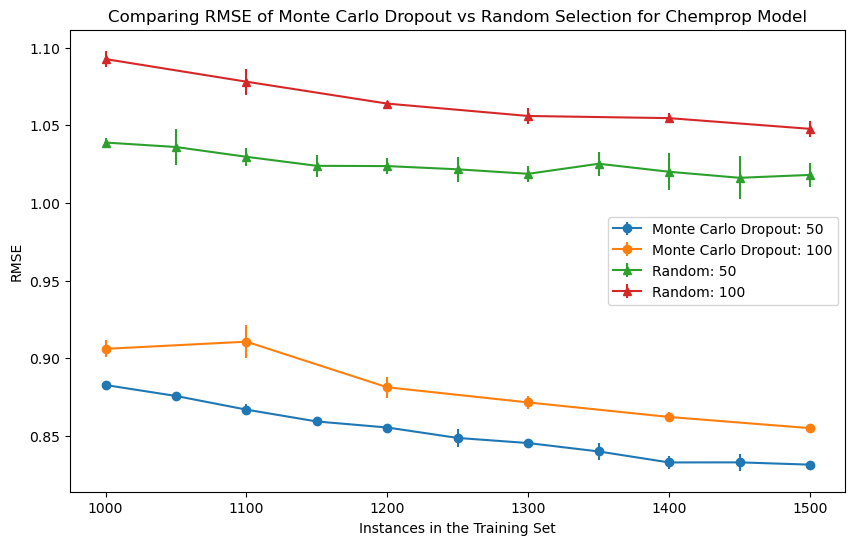

In [44]:
x_values = np.arange(1000, 1550, 50)
x_values_batch_100 = np.arange(1000, 1600, 100)
plt.figure(figsize=(10, 6))


# Monte Carlo Dropout plots
plt.errorbar(x=x_values,
             y=cp_mc["50_rmse_mean"],
             yerr=cp_mc["50_rmse_stdev"],
             label="Monte Carlo Dropout: 50", 
             marker='o')

plt.errorbar(x=x_values_batch_100,
             y=cp_mc_100["100_rmse_mean"],
             yerr=cp_mc_100["100_rmse_stdev"],
             label="Monte Carlo Dropout: 100", 
             marker='o')

# Random selection plots
plt.errorbar(x=x_values,
             y=cp_random["50_rmse_mean"],
             yerr=cp_random["50_rmse_stdev"],
             label="Random: 50", 
            marker='^')

plt.errorbar(x=x_values_batch_100,
             y=cp_random_100["100_rmse_mean"],
             yerr=cp_random_100["100_rmse_stdev"],
             label="Random: 100", 
            marker='^')

plt.title("Comparing RMSE of Monte Carlo Dropout vs Random Selection for Chemprop Model")
plt.xlabel("Instances in the Training Set")
plt.ylabel("RMSE")
plt.legend(loc='center right')
plt.show()


## Plotting $R^2$ for Chemprop Model



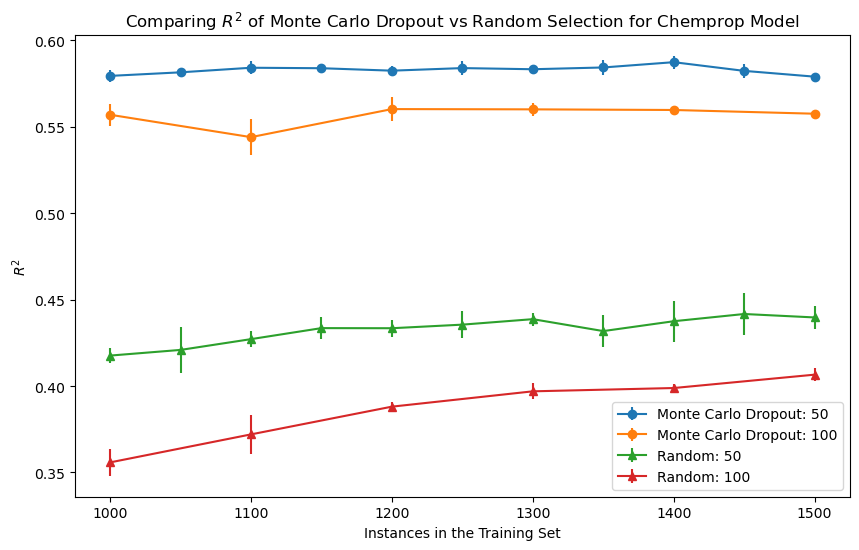

In [46]:
x_values = np.arange(1000, 1550, 50)
x_values_batch_100 = np.arange(1000, 1600, 100)

plt.figure(figsize=(10,6))

# Monte Carlo Dropout plots
plt.errorbar(x=x_values,
             y=cp_mc["50_r2_mean"],
             yerr=cp_mc["50_r2_stdev"],
             label="Monte Carlo Dropout: 50", 
                marker='o')

plt.errorbar(x=x_values_batch_100,
             y=cp_mc_100["100_r2_mean"],
             yerr=cp_mc_100["100_r2_stdev"],
             label="Monte Carlo Dropout: 100",
            marker='o')

# Random selection plots
plt.errorbar(x=x_values,
             y=cp_random["50_r2_mean"],
             yerr=cp_random["50_r2_stdev"],
             label="Random: 50", 
             marker='^')

plt.errorbar(x=x_values_batch_100,
             y=cp_random_100["100_r2_mean"],
             yerr=cp_random_100["100_r2_stdev"],
             label="Random: 100", 
             marker='^')

plt.title(r"Comparing $R^2$ of Monte Carlo Dropout vs Random Selection for Chemprop Model")
plt.xlabel("Instances in the Training Set")
plt.ylabel("$R^2$")
plt.legend(loc='lower right')
plt.show()

## Plotting the Final $R^2$ for Monte Carlo and Random Sampling 

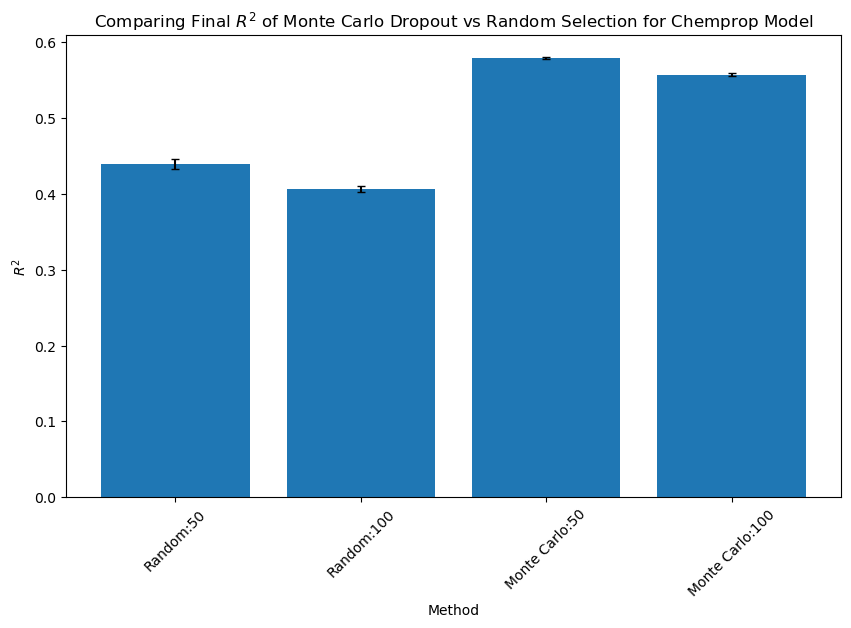

In [32]:
avgs = [cp_random["50_r2_mean"].iloc[-1],
        cp_random["100_r2_mean"].iloc[5], 
        cp_mc["50_r2_mean"].iloc[-1],
        cp_mc["100_r2_mean"].iloc[5],
       ]

stds = [cp_random["50_r2_stdev"].iloc[-1],
        cp_random["100_r2_stdev"].iloc[5], 
        cp_mc["50_r2_stdev"].iloc[-1],
        cp_mc["100_r2_stdev"].iloc[5],
       ]
orange_shade = (255/255, 165/255, 0/255)
plt.figure(figsize=(10,6))
plt.bar(range(len(avgs)), avgs, yerr = stds, capsize=3)
plt.xlabel('Method')
plt.ylabel(r"$R^2$")
plt.title(r"Comparing Final $R^2$ of Monte Carlo Dropout vs Random Selection for Chemprop Model")
plt.xticks(range(len(avgs)), ["Random:50",
                              "Random:100",
                              "Monte Carlo:50",
                              "Monte Carlo:100",
                              ],
                rotation=45)

plt.show()
#color='#FA7E5B'

## Plotting the Final RMSE for Monte Carlo and Random Sampling 

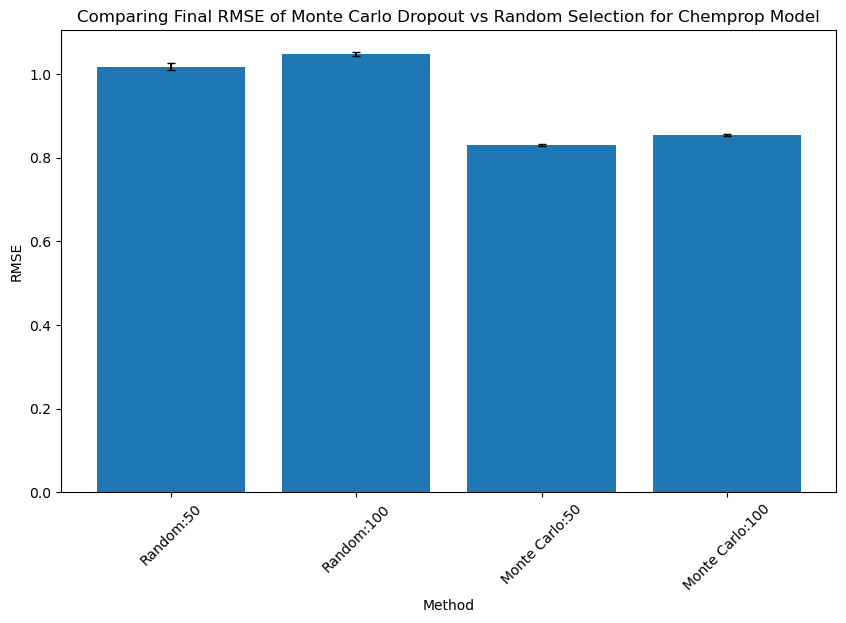

In [33]:
avgs = [cp_random["50_rmse_mean"].iloc[-1],
        cp_random["100_rmse_mean"].iloc[5],
        cp_mc["50_rmse_mean"].iloc[-1],
        cp_mc["100_rmse_mean"].iloc[5],
       ]

stds = [ cp_random["50_rmse_stdev"].iloc[-1],
        cp_random["100_rmse_stdev"].iloc[5],
        cp_mc["50_rmse_stdev"].iloc[-1],
        cp_mc["100_rmse_stdev"].iloc[5],
       ]
plt.figure(figsize=(10,6))
plt.bar(range(len(avgs)), avgs, yerr = stds, capsize=3)
plt.xlabel('Method')
plt.ylabel('RMSE')
plt.title('Comparing Final RMSE of Monte Carlo Dropout vs Random Selection for Chemprop Model')
plt.xticks(range(len(avgs)), ["Random:50",
                              "Random:100",
                              "Monte Carlo:50",
                              "Monte Carlo:100",
                              ],
                rotation=45)

plt.show()